In [269]:
import glob
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


%matplotlib inline

plt.rcParams["figure.figsize"] = [16, 10]

## Normalize JSON turnout data

https://vt.ncsbe.gov/RegStat/

In [270]:
ls -lah data/registration

total 1512
drwxr-xr-x  29 mookerji  staff   928B Aug  9 14:55 ./
drwxr-xr-x  12 mookerji  staff   384B Aug  9 15:04 ../
-rw-r--r--   1 mookerji  staff    26K Aug  7 18:35 02-25-2020.json
-rw-r--r--   1 mookerji  staff    26K Aug  7 18:34 02-29-2020.json
-rw-r--r--   1 mookerji  staff    26K Jul 27 22:11 03-03-2020.json
-rw-r--r--   1 mookerji  staff    26K Jul 27 22:11 03-07-2020.json
-rw-r--r--   1 mookerji  staff    26K Jul 27 22:10 03-14-2020.json
-rw-r--r--   1 mookerji  staff    26K Jul 27 22:09 03-21-2020.json
-rw-r--r--   1 mookerji  staff    26K Jul 27 22:08 03-28-2020.json
-rw-r--r--   1 mookerji  staff    27K Jul 27 22:07 04-04-2020.json
-rw-r--r--   1 mookerji  staff    27K Jul 27 22:06 04-11-2020.json
-rw-r--r--   1 mookerji  staff    27K Jul 27 22:06 04-18-2020.json
-rw-r--r--@  1 mookerji  staff    27K Jul 27 21:18 04-25-2020.json
-rw-r--r--@  1 mookerji  staff    27K Jul 27 21:18 05-02-2020.json
-rw-r--r--@  1 mookerji  staff    27K Jul 27 21:18 05-09-2020.json
-rw-r--r-

In [271]:
glob.glob('data/registration/*.json')

['data/registration/03-14-2020.json',
 'data/registration/03-21-2020.json',
 'data/registration/08-01-2020.json',
 'data/registration/07-11-2020.json',
 'data/registration/04-18-2020.json',
 'data/registration/07-25-2020.json',
 'data/registration/06-23-2020.json',
 'data/registration/07-04-2020.json',
 'data/registration/03-07-2020.json',
 'data/registration/02-25-2020.json',
 'data/registration/06-13-2020.json',
 'data/registration/07-18-2020.json',
 'data/registration/05-09-2020.json',
 'data/registration/05-16-2020.json',
 'data/registration/08-08-2020.json',
 'data/registration/04-04-2020.json',
 'data/registration/05-02-2020.json',
 'data/registration/04-25-2020.json',
 'data/registration/06-20-2020.json',
 'data/registration/05-23-2020.json',
 'data/registration/03-28-2020.json',
 'data/registration/05-30-2020.json',
 'data/registration/06-27-2020.json',
 'data/registration/03-03-2020.json',
 'data/registration/06-06-2020.json',
 'data/registration/02-29-2020.json',
 'data/regis

In [340]:
PARTIES = ['registered.democrats(count)', 
           'registered.republicans(count)', 
           'registered.libertarians(count)', 
           'registered.green(count)', 
           'registered.constitution(count)', 
           'registered.unaffiliated(count)', 
           'registered.total(count)']

rename = {'Democrats': 'registered.democrats(count)', 
          'Republicans': 'registered.republicans(count)', 
          'Libertarians': 'registered.libertarians(count)', 
          'Green': 'registered.green(count)',
          'Constitution': 'registered.constitution(count)', 
          'Unaffiliated': 'registered.unaffiliated(count)', 
          'White': 'registered.white(count)', 
          'Black': 'registered.black(count)', 
          'AmericanIndian': 'registered.american_indian(count)',
          'Other': 'registered.other(count)', 
          'Hispanic': 'registered.hispanic(count)', 
          'Male': 'registered.male(count)', 
          'Female': 'registered.female(count)', 
          'UnDisclosedGender': 'registered.undisclosed_gender(count)', 
          'Total': 'registered.total(count)'}

def registrations_to_csv():
    files = glob.glob('data/registration/*.json')
    data = []
    for f in files:
        df = pd.read_json(f)
        df['date'] = pd.to_datetime(f.split('/')[2].rstrip('.json'))
        data.append(df.rename(columns=rename))
    return pd.concat(data)

In [341]:
registrations = registrations_to_csv()
registrations.head()

,CountyName,registered.democrats(count),registered.republicans(count),registered.libertarians(count),registered.green(count),registered.constitution(count),registered.unaffiliated(count),registered.white(count),registered.black(count),registered.american_indian(count),registered.other(count),registered.hispanic(count),registered.male(count),registered.female(count),registered.undisclosed_gender(count),registered.total(count),date
0,ALAMANCE,36792,33375,556,17,42,31955,70181,21076,258,11222,3998,44020,53978,4739,102737,2020-03-14
1,ALEXANDER,5242,10930,91,1,15,7518,21612,931,35,1219,334,11145,12006,646,23797,2020-03-14
2,ALLEGHANY,2194,2704,33,2,1,2259,6666,73,7,447,177,3330,3606,257,7193,2020-03-14
3,ANSON,10111,2478,29,7,24,3372,6656,6818,27,2520,82,6205,7558,2258,16021,2020-03-14
4,ASHE,4539,8082,76,3,7,5660,17504,103,21,739,208,8491,9511,365,18367,2020-03-14


In [342]:
registrations.to_csv('data/registrations2020.csv', index=False)

In [343]:
registrations.columns

Index(['CountyName', 'registered.democrats(count)',
       'registered.republicans(count)', 'registered.libertarians(count)',
       'registered.green(count)', 'registered.constitution(count)',
       'registered.unaffiliated(count)', 'registered.white(count)',
       'registered.black(count)', 'registered.american_indian(count)',
       'registered.other(count)', 'registered.hispanic(count)',
       'registered.male(count)', 'registered.female(count)',
       'registered.undisclosed_gender(count)', 'registered.total(count)',
       'date'],
      dtype='object')

## CVAP (estimate)

https://data.census.gov/cedsci/table?q=B05003&g=0400000US37,37.050000&tid=ACSDT5Y2018.B05003&vintage=2014&y=2018

In [275]:
ls -lah data/cvap/

total 16
drwxr-xr-x  10 mookerji  staff   320B Aug  9 14:37 ./
drwxr-xr-x  12 mookerji  staff   384B Aug  9 15:04 ../
-rw-r--r--@  1 mookerji  staff   6.0K Aug  9 14:33 .DS_Store
drwxr-xr-x@  8 mookerji  staff   256B Jul 28 18:18 productDownload_2020-07-28T211825/
drwxr-xr-x@  8 mookerji  staff   256B Aug  7 22:00 productDownload_2020-08-08T010026/
drwx------@  8 mookerji  staff   256B Aug  9 14:03 productDownload_2020-08-09T170305/
drwx------@  8 mookerji  staff   256B Aug  9 14:25 productDownload_2020-08-09T172511/
drwx------@  8 mookerji  staff   256B Aug  9 14:33 productDownload_2020-08-09T173308/
drwx------@  8 mookerji  staff   256B Aug  9 14:35 productDownload_2020-08-09T173516/
drwx------@  8 mookerji  staff   256B Aug  9 14:37 productDownload_2020-08-09T173721/


In [315]:
cols = ['Estimate!!Total!!Female!!18 years and over!!Foreign born!!Naturalized U.S. citizen',
        'Estimate!!Total!!Female!!18 years and over!!Native',
        'Estimate!!Total!!Male!!18 years and over!!Foreign born!!Naturalized U.S. citizen',
        'Estimate!!Total!!Male!!18 years and over!!Native',
       ] 

def read_cvap_data(filename, col='cvap.all_races(count)'):
    cvap_df = pd.read_csv(filename, skiprows=1)
    cvap_df['CountyName'] = cvap_df['Geographic Area Name'].apply(lambda t: t.replace(' County, North Carolina', '').upper())
    cvap_df.set_index('CountyName', inplace=True, drop=False)
    cvap_df[col] = cvap_df[cols].sum(axis=1)
    cvap_df.drop('NORTH CAROLINA', inplace=True)
    return cvap_df[[col, 'CountyName']]

In [316]:
filename = 'data/cvap/productDownload_2020-07-28T211825/ACSDT5Y2018.B05003_data_with_overlays_2020-07-28T211821.csv'
cvap_df = read_cvap_data(filename)
cvap_df.to_csv('data/cvap2020_all_races.csv', index=False)
cvap_df

,cvap.all_races(count),CountyName
CountyName,,
MITCHELL,11930,MITCHELL
GREENE,15373,GREENE
CHOWAN,11146,CHOWAN
CALDWELL,63099,CALDWELL
CATAWBA,115407,CATAWBA
...,...,...
DAVIDSON,122830,DAVIDSON
HERTFORD,18989,HERTFORD
PENDER,44201,PENDER


In [317]:
cvap_aa_df = read_cvap_data('data/cvap/productDownload_2020-08-08T010026/ACSDT5Y2018.B05003B_data_with_overlays_2020-08-08T005955.csv', 
                            col='cvap.black_aa(count)' )
cvap_aa_df.to_csv('data/cvap2020_black_aa.csv', index=False)
cvap_aa_df.head()

,cvap.black_aa(count),CountyName
CountyName,,
MITCHELL,53,MITCHELL
GREENE,6093,GREENE
CHOWAN,3774,CHOWAN
CALDWELL,2933,CALDWELL
CATAWBA,9832,CATAWBA


In [318]:
cvap_white_df = read_cvap_data('data/cvap/productDownload_2020-08-09T170305/ACSDT5Y2018.B05003H_data_with_overlays_2020-08-09T170249.csv', 
                               col='cvap.white(count)' )
cvap_white_df.to_csv('data/cvap2020_white.csv', index=False)
cvap_white_df.head()

,cvap.white(count),CountyName
CountyName,,
MITCHELL,11452,MITCHELL
GREENE,8262,GREENE
CHOWAN,7057,CHOWAN
CALDWELL,58071,CALDWELL
CATAWBA,96398,CATAWBA


In [322]:
cvap = cvap_df.join(cvap_aa_df, rsuffix='_r').drop(['CountyName_r'], axis=1).join(cvap_white_df, rsuffix='_r').drop(['CountyName_r'], axis=1)
cvap['pct_cvap.black_aa(%)'] = 100*cvap['cvap.black_aa(count)']/cvap['cvap.all_races(count)']
cvap['pct_cvap.white(%)'] = 100*cvap['cvap.white(count)']/cvap['cvap.all_races(count)']
cvap['pct_cvap.all_races.within_state(%)'] = 100*cvap['cvap.all_races(count)']/cvap['cvap.all_races(count)'].sum()
cvap.to_csv('data/cvap2020.csv', index=False)
cvap.head()

,cvap.all_races(count),CountyName,cvap.black_aa(count),cvap.white(count),pct_cvap.black_aa(%),pct_cvap.white(%),pct_cvap.all_races.within_state(%)
CountyName,,,,,,,
MITCHELL,11930,MITCHELL,53,11452,0.444258,95.993294,0.160930
GREENE,15373,GREENE,6093,8262,39.634424,53.743576,0.207374
CHOWAN,11146,CHOWAN,3774,7057,33.859681,63.314193,0.150354
CALDWELL,63099,CALDWELL,2933,58071,4.648251,92.031569,0.851173
CATAWBA,115407,CATAWBA,9832,96398,8.519414,83.528729,1.556781


In [323]:
cvap.to_csv('data/cvap2020.csv', index=False)

In [324]:
cvap.columns

Index(['cvap.all_races(count)', 'CountyName', 'cvap.black_aa(count)',
       'cvap.white(count)', 'pct_cvap.black_aa(%)', 'pct_cvap.white(%)',
       'pct_cvap.all_races.within_state(%)'],
      dtype='object')

## Post-processed

In [426]:
def add_cvap(registrations, cvap):    
    cvap_cols = ['cvap.all_races(count)', 'CountyName', 'cvap.black_aa(count)',
                 'cvap.white(count)', 'pct_cvap.black_aa(%)', 'pct_cvap.white(%)',
                 'pct_cvap.all_races.within_state(%)']
    joined = registrations.join(cvap[cvap_cols], on='CountyName', rsuffix='_r').drop(labels='CountyName_r', axis=1)
    for c in PARTIES:
        joined[c.replace('count', '%').replace('registered', 'registered_within_county_cvap')] = 100*joined[c]/joined['cvap.all_races(count)']
    parties = ['democrats', 'republicans', 'libertarians', 
               'green', 'constitution', 'unaffiliated']
    parties_col = {('registered_within_county_cvap.' + party + '(%)'): party for party in parties}
    winners = pd.DataFrame({'most_registrants(party)': joined[parties_col].idxmax(axis=1).apply(parties_col.get), 
                            'most_registered(%)': joined[parties_col].max(axis=1)})
    joined['pct_registered.within_race_cvap.black_aa(%)'] = 100*joined['registered.black(count)'] / joined['cvap.black_aa(count)']
    joined['pct_registered.among_all_races_cvap.black_aa(%)'] = 100*joined['registered.black(count)'] / joined['cvap.all_races(count)']
    joined['pct_registered.among_registered.black_aa(%)'] = 100*joined['registered.black(count)'] / joined['registered.total(count)']
    joined['pct_registered.within_race_cvap.white(%)'] = 100*joined['registered.white(count)'] / joined['cvap.white(count)']
    joined['pct_registered.among_all_races_cvap.white(%)'] = 100*joined['registered.white(count)'] / joined['cvap.all_races(count)']
    joined['pct_registered.among_registered.white(%)'] = 100*joined['registered.white(count)'] / joined['registered.total(count)']
    return pd.concat([joined, winners], axis=1)

In [427]:
joined = add_cvap(registrations, cvap)
joined.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
CountyName,ALAMANCE,ALEXANDER,ALLEGHANY,ANSON,ASHE,AVERY,BEAUFORT,BERTIE,BLADEN,BRUNSWICK,...,VANCE,WAKE,WARREN,WASHINGTON,WATAUGA,WAYNE,WILKES,WILSON,YADKIN,YANCEY
registered.democrats(count),36792,5242,2194,10111,4539,1354,11949,8649,10850,26040,...,18125,277468,8562,5184,11997,29395,8262,27525,3522,4474
registered.republicans(count),33375,10930,2704,2478,8082,6750,11115,1448,4373,40988,...,4292,183965,1900,1148,13389,23779,21843,13398,13233,4856
registered.libertarians(count),556,91,33,29,76,53,102,27,51,469,...,75,5346,43,19,479,352,142,181,98,51
registered.green(count),17,1,2,7,3,3,8,2,1,16,...,7,245,0,0,13,19,7,5,9,1
registered.constitution(count),42,15,1,24,7,3,9,2,7,35,...,20,307,2,0,14,41,12,34,10,4
registered.unaffiliated(count),31955,7518,2259,3372,5660,3428,9455,2707,6679,38390,...,6070,290286,2516,1763,19518,19199,11168,14208,6670,4074
registered.white(count),70181,21612,6666,6656,17504,10925,22804,4584,12596,88975,...,11640,482286,5141,3684,40945,41137,37883,27466,21237,12740
registered.black(count),21076,931,73,6818,103,76,7712,7664,7926,8569,...,14962,143976,6724,4028,999,24187,1624,22954,736,79
registered.american_indian(count),258,35,7,27,21,18,43,19,383,319,...,53,1912,548,10,74,138,44,103,28,21


In [428]:
joined.to_csv('data/2020_registrations_demographics.csv', index=False)

In [471]:
def compute_changes(joined):
    diffs = []
    for county, df in joined.groupby('CountyName'):
        dfg = df.sort_values('date').set_index('date').drop(['CountyName', 'most_registrants(party)'], axis=1)
        dfh = dfg - dfg.iloc[0]
        dfh['CountyName'] = county
        # Constant across all dates, but keep them around for convenience
        fixed_demographics = [
            'cvap.all_races(count)', 
            'cvap.black_aa(count)', 'pct_cvap.black_aa(%)',
            'cvap.white(count)', 'pct_cvap.white(%)',
            'pct_cvap.all_races.within_state(%)'
        ]
        for d in fixed_demographics: 
            dfh[d] = dfg[d]
        diffs.append(dfh)
    changes = pd.concat(diffs)
    parties = ['democrats', 'republicans', 'libertarians', 
               'green', 'constitution', 'unaffiliated']
    parties_col = {('registered_within_county_cvap.' + party + '(%)'): party for party in parties}
    winners = pd.DataFrame({'most_new_registrants(party)': changes[parties_col].idxmax(axis=1).apply(parties_col.get), 
                            'most_new_registered(%)': changes[parties_col].max(axis=1)})
    return pd.concat([changes, winners], axis=1)

In [472]:
changes = compute_changes(joined)
changes.head()

,registered.democrats(count),registered.republicans(count),registered.libertarians(count),registered.green(count),registered.constitution(count),registered.unaffiliated(count),registered.white(count),registered.black(count),registered.american_indian(count),registered.other(count),...,pct_registered.within_race_cvap.black_aa(%),pct_registered.among_all_races_cvap.black_aa(%),pct_registered.among_registered.black_aa(%),pct_registered.within_race_cvap.white(%),pct_registered.among_all_races_cvap.white(%),pct_registered.among_registered.white(%),most_registered(%),CountyName,most_new_registrants(party),most_new_registered(%)
date,,,,,,,,,,,,,,,,,,,,,
2020-02-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,ALAMANCE,democrats,0.000000
2020-02-29,1.0,6.0,0.0,0.0,0.0,-22.0,6.0,-10.0,1.0,-12.0,...,-0.042790,-0.008623,-0.006749,0.007096,0.005174,0.015838,0.000862,ALAMANCE,republicans,0.005174
2020-03-03,58.0,23.0,0.0,0.0,0.0,1.0,70.0,7.0,1.0,4.0,...,0.029953,0.006036,-0.009571,0.082783,0.060359,0.013631,0.050012,ALAMANCE,democrats,0.050012
2020-03-07,59.0,22.0,-1.0,-1.0,0.0,-3.0,66.0,6.0,1.0,3.0,...,0.025674,0.005174,-0.009346,0.078053,0.056910,0.013727,0.050874,ALAMANCE,democrats,0.050874
2020-03-14,113.0,36.0,-2.0,-1.0,-2.0,8.0,116.0,26.0,2.0,8.0,...,0.111254,0.022419,-0.005051,0.137184,0.100023,0.011860,0.097436,ALAMANCE,democrats,0.097436


In [474]:
changes.to_csv('data/2020_registrations_demographics_weekly_changes.csv', index=False)

In [475]:
last_date = changes.index[-1]
last_date

Timestamp('2020-08-08 00:00:00')

In [476]:
changes.T

date,2020-02-25,2020-02-29,2020-03-03,2020-03-07,2020-03-14,2020-03-21,2020-03-28,2020-04-04,2020-04-11,2020-04-18,...,2020-06-13,2020-06-20,2020-06-23,2020-06-27,2020-07-04,2020-07-11,2020-07-18,2020-07-25,2020-08-01,2020-08-08
registered.democrats(count),0,1,58,59,113,99,91,199,194,215,...,-22,-26,-27,-31,-31,-37,-43,-46,-51,-51
registered.republicans(count),0,6,23,22,36,131,145,325,335,352,...,-19,-31,-35,-37,-37,87,91,94,101,110
registered.libertarians(count),0,0,0,-1,-2,-5,-16,-17,-16,-16,...,0,0,0,0,0,2,0,0,0,2
registered.green(count),0,0,0,-1,-1,0,1,2,2,2,...,0,0,0,0,0,0,0,0,0,0
registered.constitution(count),0,0,0,0,-2,-5,-5,-3,-1,-1,...,0,0,0,0,0,0,0,0,0,0
registered.unaffiliated(count),0,-22,1,-3,8,109,161,355,369,396,...,-24,-29,-30,-30,-31,76,80,74,78,88
registered.white(count),0,6,70,66,116,182,194,428,420,423,...,-81,-101,-107,-113,-113,12,7,-1,2,11
registered.black(count),0,-10,7,6,26,61,76,183,187,198,...,0,0,0,0,0,0,0,0,0,1
registered.american_indian(count),0,1,1,1,2,2,1,2,2,2,...,-2,-2,-2,-2,-2,-1,0,0,0,0
registered.other(count),0,-12,4,3,8,84,106,248,274,325,...,18,17,17,17,16,117,121,123,126,137


## Percentage Change vs CVAP

In [435]:
def plot_latest_change(changes, party, size_axis='cvap.all_races(count)'):
    dat = changes.T[last_date].T
    ax = dat.plot.scatter(x=size_axis, y=party)
    dat[[size_axis, party,'CountyName']].apply(lambda row: ax.text(*row),axis=1)    

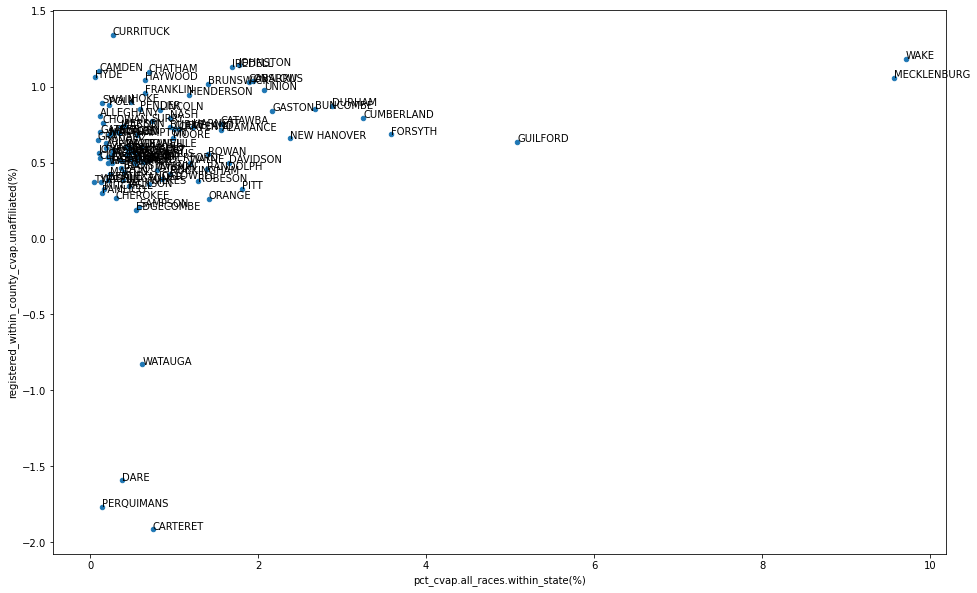

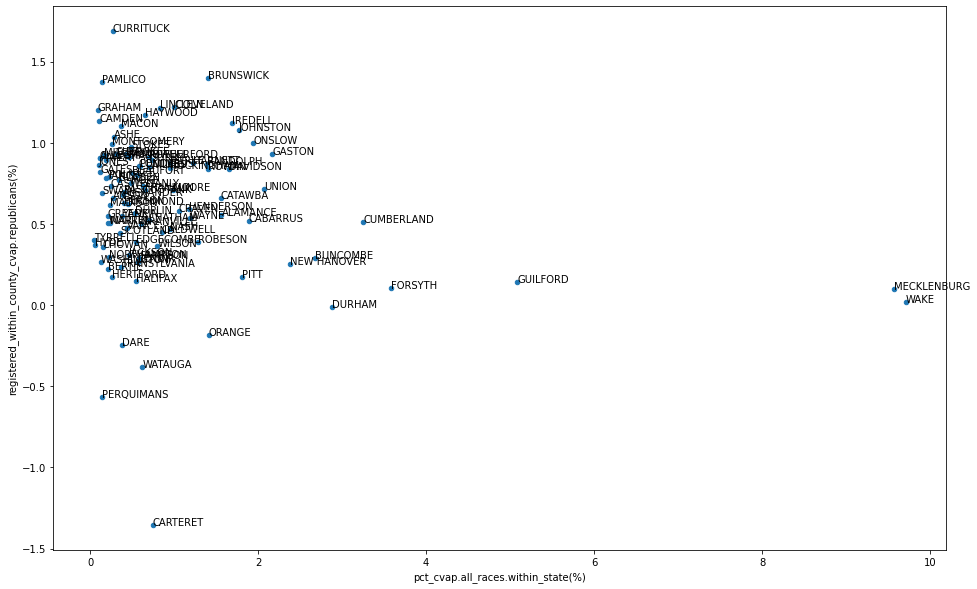

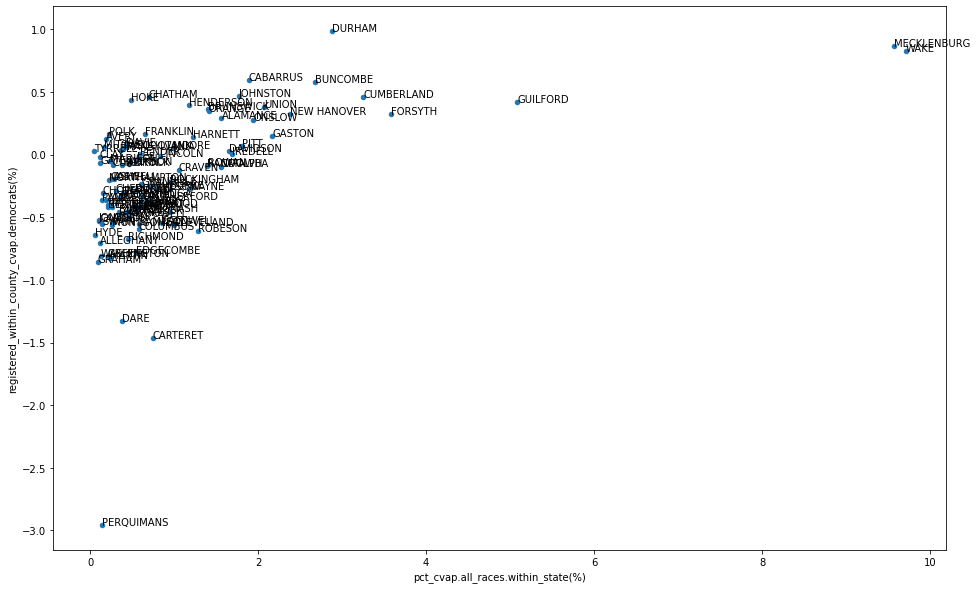

In [436]:
size_axis = 'pct_cvap.all_races.within_state(%)'
plot_latest_change(changes, 'registered_within_county_cvap.unaffiliated(%)', size_axis)
plot_latest_change(changes, 'registered_within_county_cvap.republicans(%)', size_axis)
plot_latest_change(changes, 'registered_within_county_cvap.democrats(%)', size_axis)

In [448]:
cols = ['CountyName', 
        'most_new_registered(%)', 'most_new_registrants(party)', 
        'pct_cvap.all_races.within_state(%)']
winners = changes[cols].T[last_date].T
winners

,CountyName,most_new_registered(%),most_new_registrants(party),pct_cvap.all_races.within_state(%)
date,,,,
2020-08-08,ALAMANCE,0.713097,unaffiliated,1.56442
2020-08-08,ALEXANDER,0.677635,republicans,0.38619
2020-08-08,ALLEGHANY,0.902987,republicans,0.116522
2020-08-08,ANSON,0.657136,republicans,0.268913
2020-08-08,ASHE,1.03408,republicans,0.286989
...,...,...,...,...
2020-08-08,WAYNE,0.537286,republicans,1.18504
2020-08-08,WILKES,0.852446,republicans,0.70577
2020-08-08,WILSON,0.452016,unaffiliated,0.799792


In [449]:
winners['most_new_registrants(party)'].value_counts()

republicans     55
unaffiliated    39
democrats        2
constitution     2
green            2
Name: most_new_registrants(party), dtype: int64

In [417]:
colormap = {'registered_within_county_cvap.unaffiliated(%)': 'green', 
            'registered_within_county_cvap.republicans(%)': 'red', 
            'registered_within_county_cvap.constitution(%)': 'black',
            'registered_within_county_cvap.green(%)': 'black', 
            'registered_within_county_cvap.democrats(%)': 'blue'}

In [422]:
winners

,CountyName,most_new_registered(%),most_new_registrants(party),pct_cvap.all_races.within_state(%)
date,,,,
2020-08-08,ALAMANCE,0.713097,unaffiliated,1.56442
2020-08-08,ALEXANDER,0.677635,republicans,0.38619
2020-08-08,ALLEGHANY,0.902987,republicans,0.116522
2020-08-08,ANSON,0.657136,republicans,0.268913
2020-08-08,ASHE,1.03408,republicans,0.286989
...,...,...,...,...
2020-08-08,WAYNE,0.537286,republicans,1.18504
2020-08-08,WILKES,0.852446,republicans,0.70577
2020-08-08,WILSON,0.452016,unaffiliated,0.799792


date
2020-08-08    Text(1.5644161393064597, 0.713097013960148, 'A...
2020-08-08    Text(0.3861904896157264, 0.6776345663488073, '...
2020-08-08    Text(0.11652217853577297, 0.9029868025005783, ...
2020-08-08    Text(0.2689128998738868, 0.6571356909957373, '...
2020-08-08    Text(0.2869888108761947, 1.0340775558166868, '...
                                    ...                        
2020-08-08    Text(1.1850378400311554, 0.5372855695568504, '...
2020-08-08    Text(0.7057698982393658, 0.8524464831804295, '...
2020-08-08    Text(0.7997916144230122, 0.4520155169505813, '...
2020-08-08    Text(0.3819143226099565, 0.5474710370161091, '...
2020-08-08    Text(0.18912259123310224, 0.7845934379457944, ...
Length: 100, dtype: object

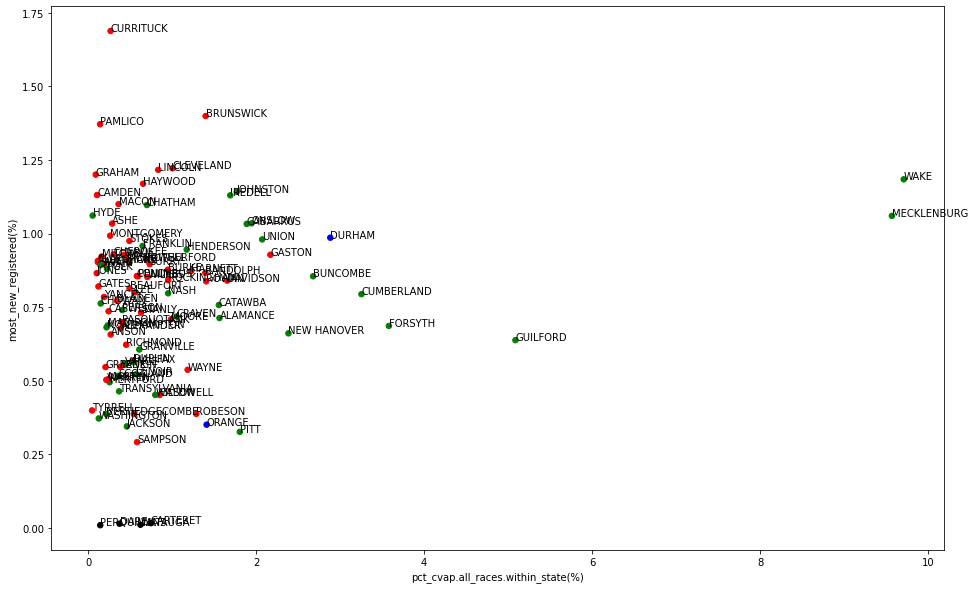

In [450]:
colormap = {'registered_within_county_cvap.unaffiliated(%)': 'green', 
            'registered_within_county_cvap.republicans(%)': 'red', 
            'registered_within_county_cvap.constitution(%)': 'black',
            'registered_within_county_cvap.green(%)': 'black', 
            'registered_within_county_cvap.democrats(%)': 'blue'}

def get_color(party): 
    return colormap.get('registered_within_county_cvap.' + party + '(%)')

ax = winners.plot.scatter(x='pct_cvap.all_races.within_state(%)', 
                          y='most_new_registered(%)', 
                          c=winners['most_new_registrants(party)'].apply(get_color).values, s=30)                               
winners[['pct_cvap.all_races.within_state(%)','most_new_registered(%)','CountyName']].apply(lambda row: ax.text(*row, fontsize=10),axis=1)

0     Text(1.5644161393064597, 31.9177739646297, 'AL...
1     Text(0.3861904896157264, 38.63914212861085, 'A...
2     Text(0.11652217853577297, 32.032877981014124, ...
3     Text(0.2689128998738868, 50.268372209681466, '...
4     Text(0.2869888108761947, 39.01762632197415, 'A...
                            ...                        
95    Text(1.1850378400311554, 33.31512026317886, 'W...
96    Text(0.7057698982393658, 42.190366972477065, '...
97    Text(0.7997916144230122, 46.17473435655254, 'W...
98    Text(0.3819143226099565, 47.022463972873695, '...
99    Text(0.18912259123310224, 35.44935805991441, '...
Length: 100, dtype: object

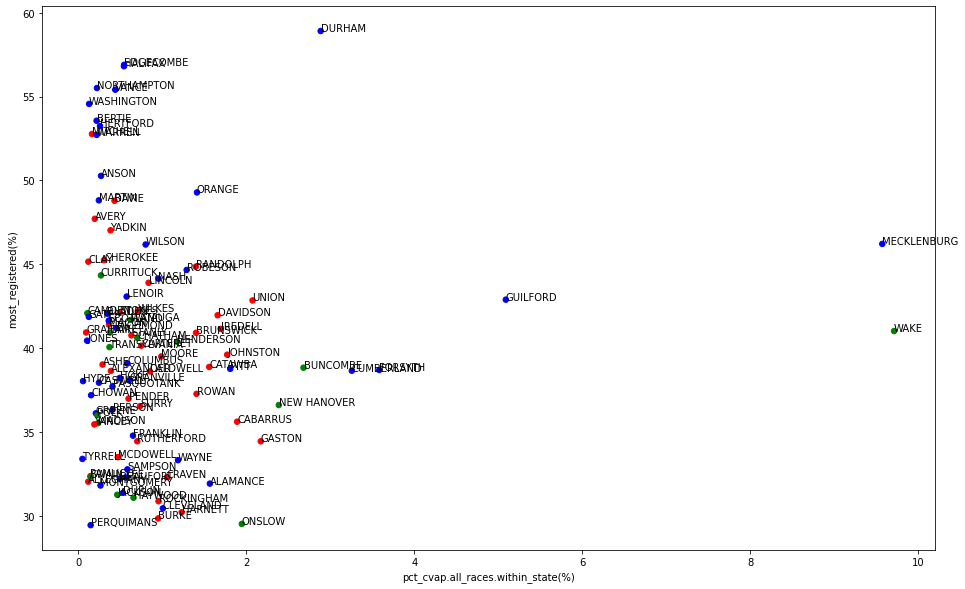

In [461]:
cols = ['CountyName', 
        'most_registered(%)', 'most_registrants(party)', 
        'pct_cvap.all_races.within_state(%)', 'date']

recent = joined[joined.date == last_date]
ax = recent.plot.scatter(x='pct_cvap.all_races.within_state(%)', 
                         y='most_registered(%)', 
                         c=recent['most_registrants(party)'].apply(get_color).values, s=30)                               
recent[['pct_cvap.all_races.within_state(%)','most_registered(%)','CountyName']].apply(lambda row: ax.text(*row, fontsize=10),axis=1)

## Individual Counties

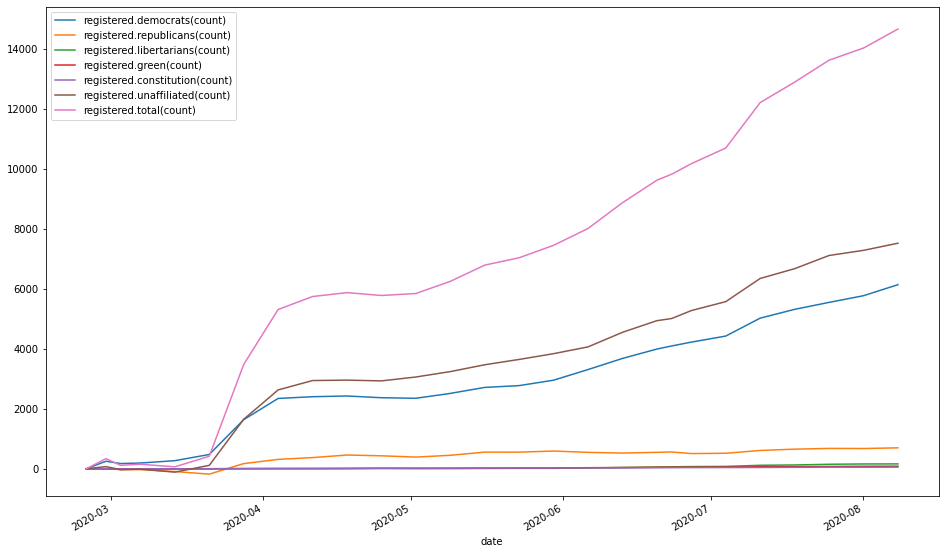

In [409]:
changes[changes.CountyName == 'MECKLENBURG'][PARTIES].plot()

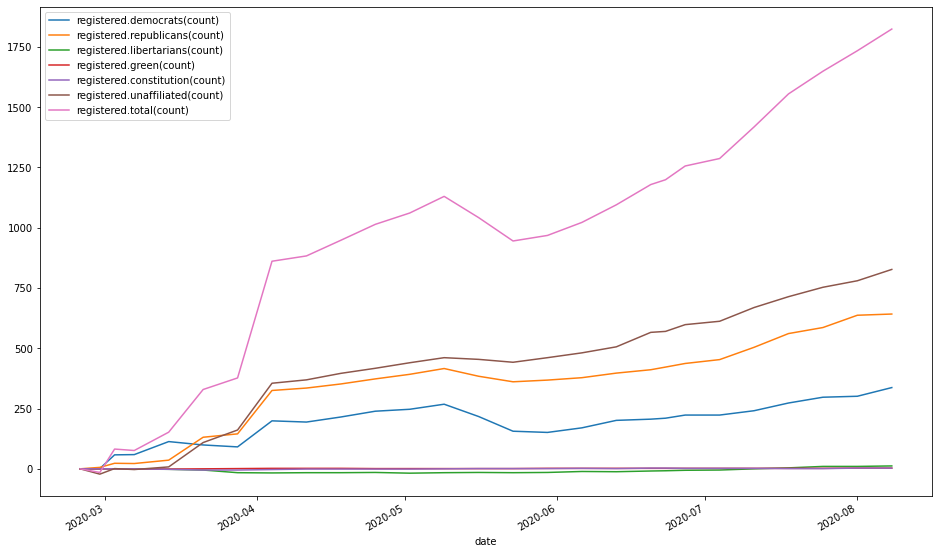

In [410]:
changes[changes.CountyName == 'ALAMANCE'][PARTIES].plot()

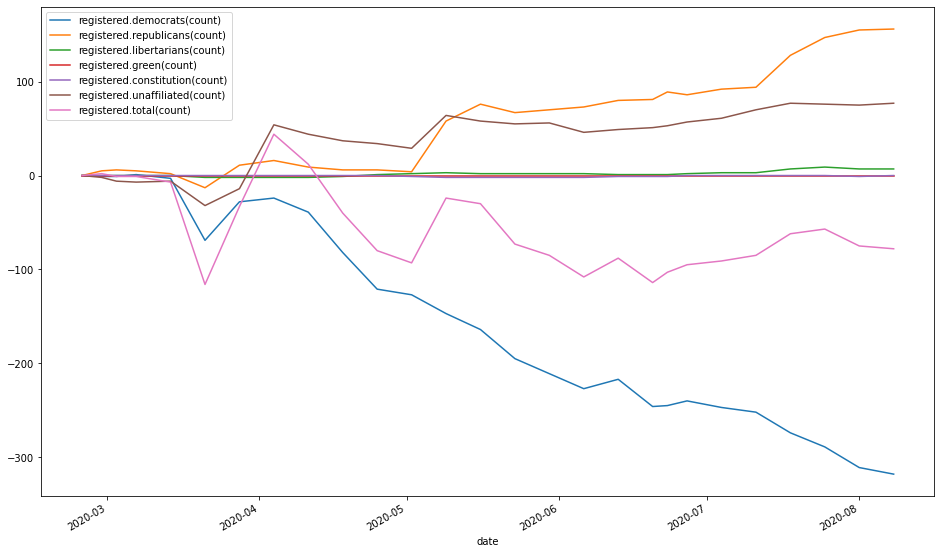

In [411]:
changes[changes.CountyName == 'EDGECOMBE'][PARTIES].plot()

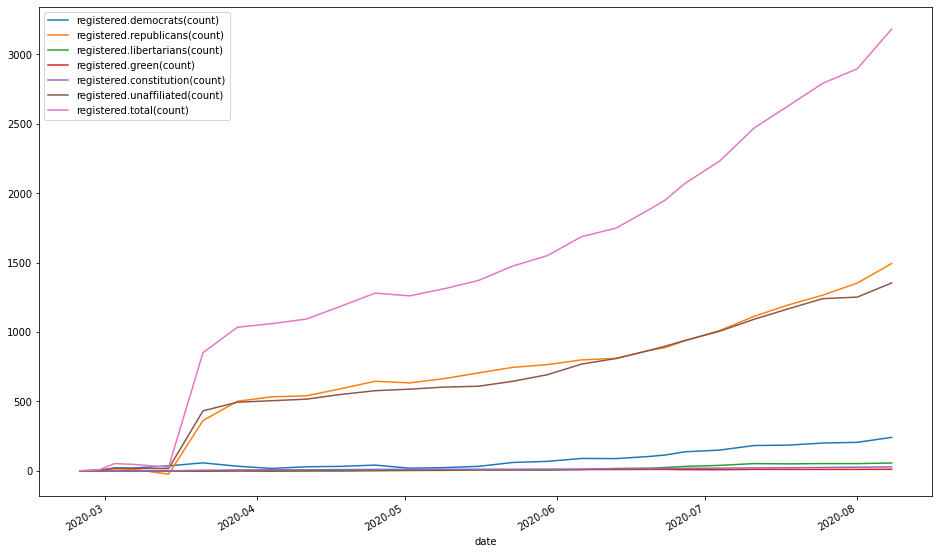

In [500]:
changes[changes.CountyName == 'GASTON'][PARTIES].plot()

## Demographic Breakdowns

In [478]:
recent = changes.T[last_date].T
recent.head().T

date,2020-08-08,2020-08-08,2020-08-08,2020-08-08,2020-08-08
registered.democrats(count),337,-133,-61,-105,-41
registered.republicans(count),642,194,78,131,220
registered.libertarians(count),12,7,-3,1,2
registered.green(count),3,2,2,1,0
registered.constitution(count),3,5,1,-1,2
registered.unaffiliated(count),827,111,70,116,149
registered.white(count),127,-65,7,15,84
registered.black(count),203,-4,2,-24,3
registered.american_indian(count),0,0,1,1,0
registered.other(count),1494,255,77,151,245


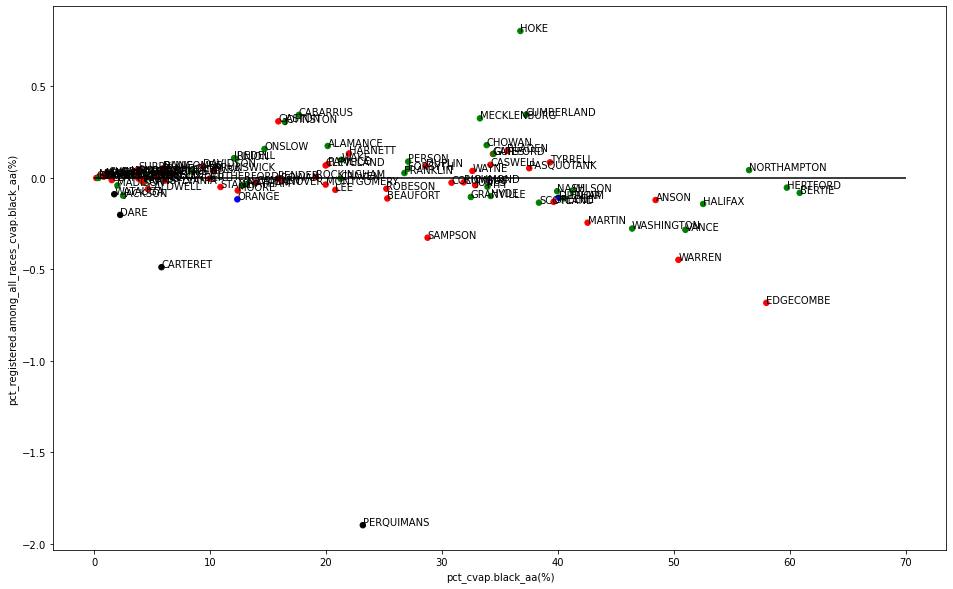

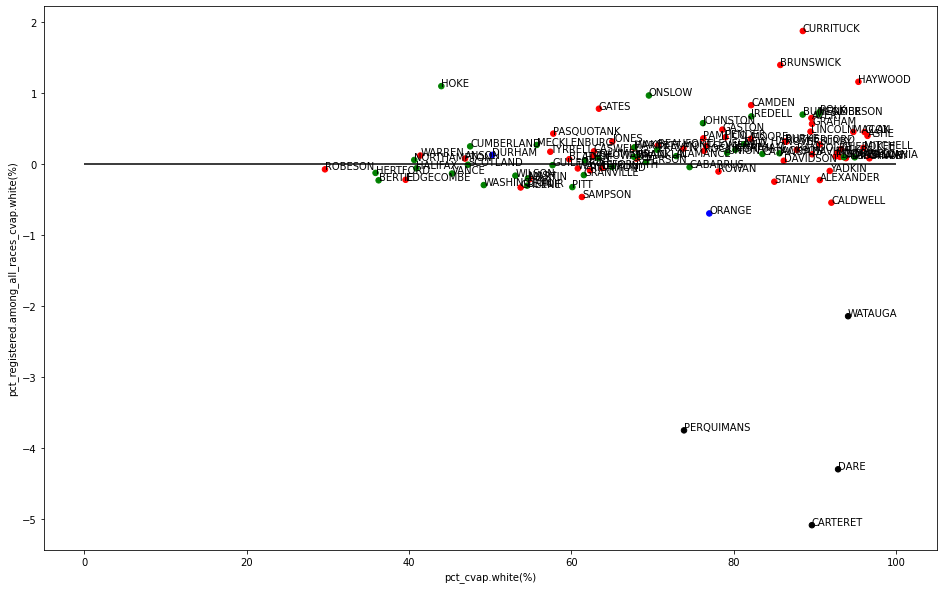

In [499]:
ax = recent.plot.scatter(y='pct_registered.among_all_races_cvap.black_aa(%)', 
                    x='pct_cvap.black_aa(%)', 
                    c=recent['most_new_registrants(party)'].apply(get_color).values, s=30)
recent[['pct_cvap.black_aa(%)','pct_registered.among_all_races_cvap.black_aa(%)','CountyName']].apply(lambda row: ax.text(*row, fontsize=10),axis=1)
ax.hlines(0, 0, 70)

ax = recent.plot.scatter(y='pct_registered.among_all_races_cvap.white(%)', 
                    x='pct_cvap.white(%)', 
                    c=recent['most_new_registrants(party)'].apply(get_color).values, s=30)
recent[['pct_cvap.white(%)','pct_registered.among_all_races_cvap.white(%)','CountyName']].apply(lambda row: ax.text(*row, fontsize=10),axis=1)
ax.hlines(0, 0, 100)

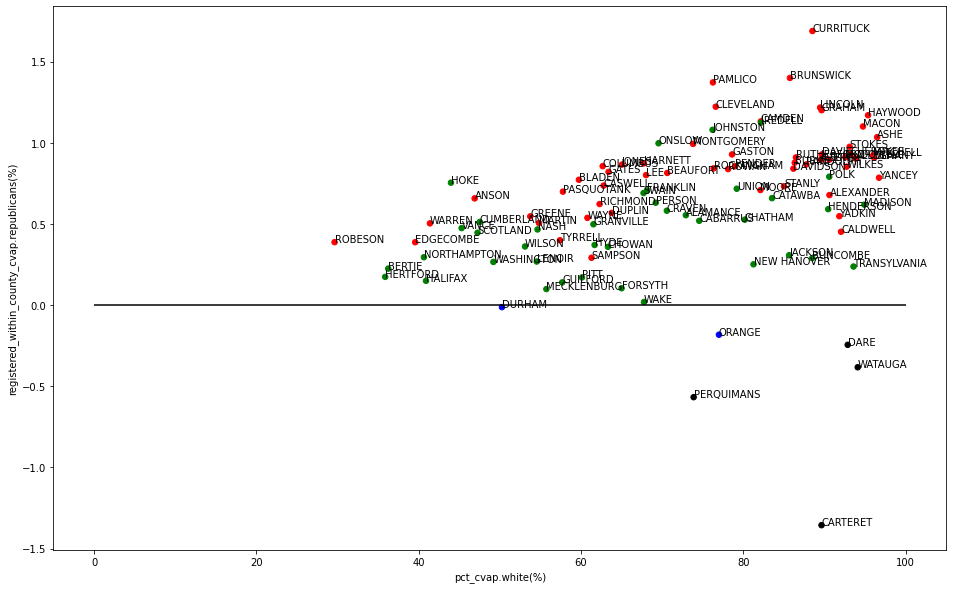

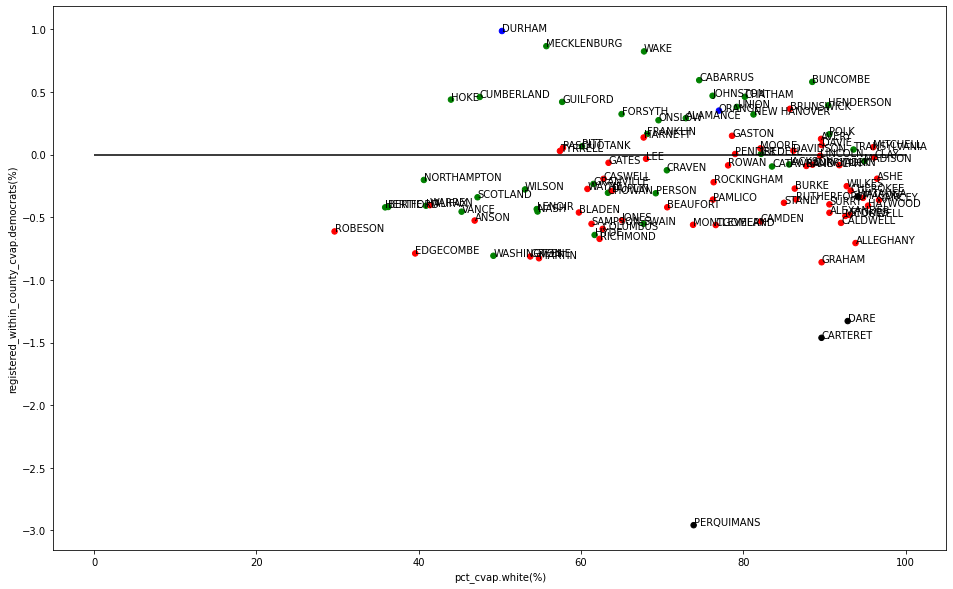

In [496]:
ax = recent.plot.scatter(y='registered_within_county_cvap.republicans(%)', 
                         x='pct_cvap.white(%)', 
                         c=recent['most_new_registrants(party)'].apply(get_color).values, s=30)
recent[['pct_cvap.white(%)','registered_within_county_cvap.republicans(%)','CountyName']].apply(lambda row: ax.text(*row, fontsize=10),axis=1)
ax.hlines(0, 0, 100)

ax = recent.plot.scatter(y='registered_within_county_cvap.democrats(%)', 
                         x='pct_cvap.white(%)', 
                         c=recent['most_new_registrants(party)'].apply(get_color).values, s=30)
recent[['pct_cvap.white(%)','registered_within_county_cvap.democrats(%)','CountyName']].apply(lambda row: ax.text(*row, fontsize=10),axis=1)
ax.hlines(0, 0, 100)

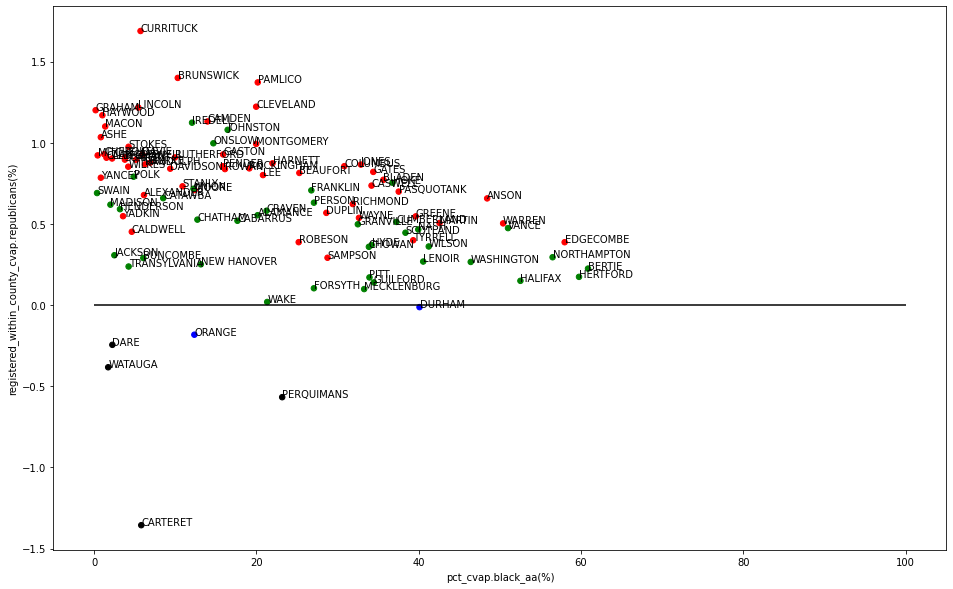

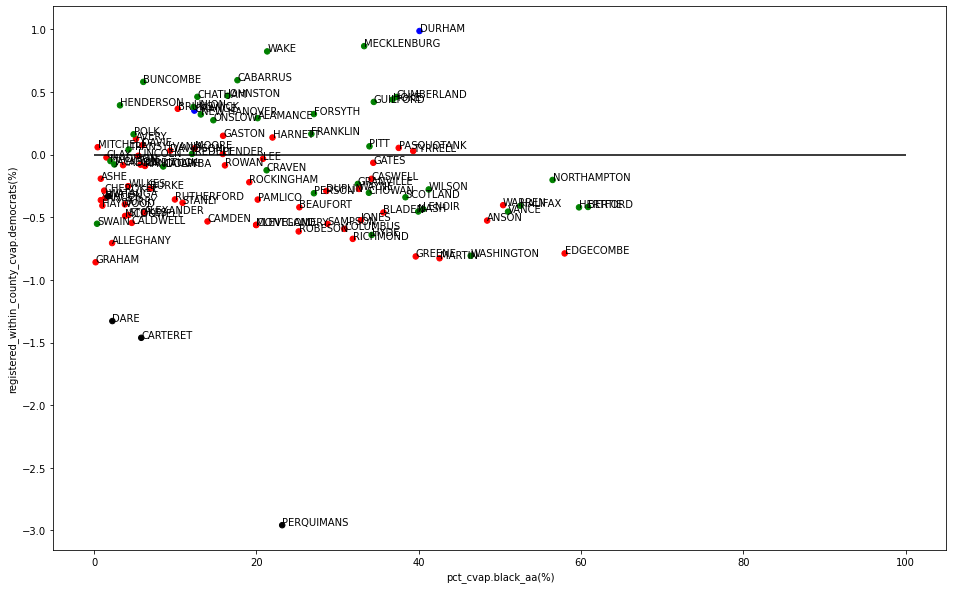

In [497]:
ax = recent.plot.scatter(y='registered_within_county_cvap.republicans(%)', 
                         x='pct_cvap.black_aa(%)', 
                         c=recent['most_new_registrants(party)'].apply(get_color).values, s=30)
recent[['pct_cvap.black_aa(%)','registered_within_county_cvap.republicans(%)','CountyName']].apply(lambda row: ax.text(*row, fontsize=10),axis=1)
ax.hlines(0, 0, 100)

ax = recent.plot.scatter(y='registered_within_county_cvap.democrats(%)', 
                         x='pct_cvap.black_aa(%)', 
                         c=recent['most_new_registrants(party)'].apply(get_color).values, s=30)
recent[['pct_cvap.black_aa(%)','registered_within_county_cvap.democrats(%)','CountyName']].apply(lambda row: ax.text(*row, fontsize=10),axis=1)
ax.hlines(0, 0, 100)

## 